# Umbral de Color, Pantalla Azul

En este notebook implementaremos una simple pantalla azul utilizando una técnica de computer vision conocida como **umbral de color**. Como de costumbre, utilizaremos la librería de computer vision por excelencia: OpenCV.

---

Empecemos importando las librerías que utilizaremos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline 

En este ejercicio usaremos la imagen de una pizza sobre un fondo azul. Nuestro trabajo, entonces, será extraer la región azul del fondo para poder intercambiarla con cualquier otro fondo de nuestra elección. En este caso, dicho fondo será una imagen del espacio exterior.

In [2]:
# Lee la imagen
image = cv2.imread('images/pizza_bluescreen.jpg')

# Imprime el tipo de dato y las dimensiones de la imagen
print(f'Esta imagen es de tipo {type(image)} con dimensiones: {image.shape}')

Esta imagen es de tipo <class 'numpy.ndarray'> con dimensiones: (514, 816, 3)


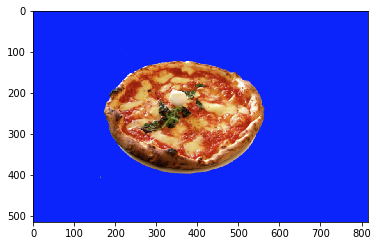

In [3]:
# Haz una copia de la imagen. Esta es una buena práctica, puesto
# que cualquier transformación que hagamos sobre la copia
# no afectará a la imagen original.
image_copy = np.copy(image)

# Cambia el color a RGB (Recuerda que OpenCV carga las imágenes
# en formato BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Muestra la copia de la imagen:
plt.imshow(image_copy)

Como podemos ver, el fondo de la imagen es todo azul. Esa es nuestra región de interés.

## Definiendo el umbral de color

Para capturarlo, utilizaremos un umbral de color. Esto lo haremos definiendo rangos numéricos para cada canal.

In [4]:
# Define los límites del rango de selección de color para cada canal 
# en el espacio RGB.
lower_blue = np.array([0, 0, 220])
upper_blue = np.array([250, 250, 255])

## Crea una máscara

Una máscara es, básicamente, una imagen binaria donde los píxeles que estén dentro del rango definido arriba tendrán un valor distinto a cero. ¿Qué quiere decir esto? Recordando que el color negro es representado por la terna [0, 0, 0], los pixeles desactivados (aquellos que la máscara no captura) serán negros.

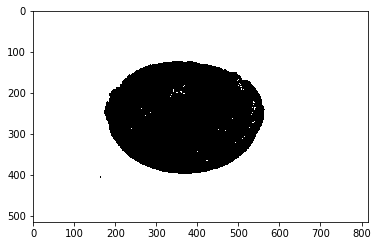

In [5]:
# Define el área de la máscara.
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualiza la máscara
plt.imshow(mask, cmap='gray')

## Aplicando la máscara

Para aplicar esta máscara a la imagen de la pizza sobre el fondo azul, lo que haremos será _desactivar_ (asignar negro, [0, 0, 0]) a aquellos pixeles en la imagen original tales que hayan sido capturados por la máscara.

El resultado de esta operación será una pizza sobre un fondo negro.

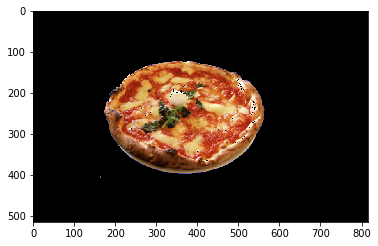

In [6]:
# Aplica la máscara a la imagen para aislar la pizza.
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# ¡Muéstrala!
plt.imshow(masked_image)

## Cargando el fondo y aplicando la máscara de manera inversa

Ahora, carguemos una imagen del espacio exterior, la cual utilizaremos como fondo para nuestra pizza

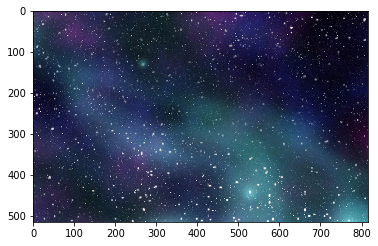

In [7]:
# Carga la imagen y conviértela a RGB.
background_image= cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Córtala del tamaño correcto
crop_background = background_image[0:514, 0:816]

# Muéstrala
plt.imshow(crop_background)

Muy bien. Ahora apliquemos la máscara de manera inversa a como lo hicimos con la pizza. Esta vez, desactivaremos los mismos pixeles que están desactivados en la máscara.

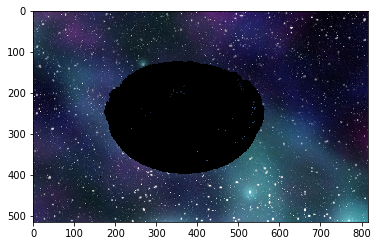

In [8]:
crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

## Creando una imagen completa

Como podemos ver, el resultado de aplicar la máscara de manera directa e inversa produjo dos imágenes perfectamente complementarias, por lo que para enviar a nuestra pizza al espacio, sólo debemos sumarlas.

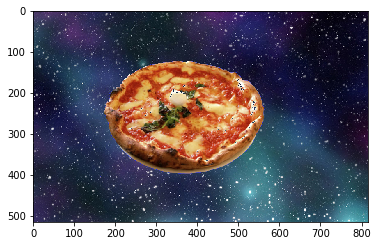

In [9]:
complete_image = masked_image + crop_background

plt.imshow(complete_image)

¡Perfecto! Ya tenemos nuestra pizza astronauta ;)